# Sin Wave Test Example
This example tests the code by training on inputing and outputing the same points along a sin wave.

## Setup
Import HAPI and other packages

In [2]:
from hapiclient import hapi, hapitime2datetime
from datetime import datetime
from hapiplot import hapiplot
from hapi_nn import HAPINNTrainer, HAPINNTester, config
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
warnings.simplefilter('always')

### HAPI Setup
Set HAPI related parameters

In [4]:
config.MODEL_ENGINE = 'TENSORFLOW'

server = 'http://hapi-server.org/servers/TestData2.0/hapi'
dataset = 'dataset1'
start = '1970-01-01T00:00:00Z'
stop = '1970-01-02T00:00:00Z'

start2 = '1970-01-02T01:00:00Z'
stop2 = '1970-01-02T02:00:00Z'

parameters = 'vector'
options = {'logging': True, 'usecache': True, 'cachedir': './hapicache'}

## HAPI-NN Testing
Begin testing HAPI-NN

In [5]:
in_steps = 512
out_steps = 512

### Create Trainer and Tester as well as load data with HAPI

Create Trainer

In [6]:
splits = (.5, .05, .45)  # Train, Validation, Test

means = {}
stds = {}
def func(data):
    global means, stds
    for name in data.dtype.names:
        means[name] = data[name].mean()
        stds[name] = data[name].std()
        data[name] = (data[name] - means[name]) / stds[name]
    return data
    
func = HAPINNTrainer.ignore_gaps(func)

# Just testing on_gaps on top of ignore_gaps
# Not needed
func2 = HAPINNTrainer.on_gaps(lambda x: x)
def func3(data):
    data = func(data)
    data = func2(data)
    return data

trainer = HAPINNTrainer(
    splits, in_steps, out_steps,
    preprocess_func=func3,
    preprocess_y_func=func3,
    lag=False
)

/home/jovyan/users_conda_envs/HAPINN/lib/python3.10/site-packages/flatbuffers/compat.py:19: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp
/home/jovyan/users_conda_envs/HAPINN/lib/python3.10/site-packages/keras_preprocessing/image/utils.py:23: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': pil_image.NEAREST,
/home/jovyan/users_conda_envs/HAPINN/lib/python3.10/site-packages/keras_preprocessing/image/utils.py:24: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': pil_image.BILINEAR,
/home/jovyan/users_conda_envs/HAPINN/lib/python3.10/site-packages/keras_preprocessing/image/utils.py:25: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use

Load data for Training

Model input will come from vector in HAPI dataset and will be the first element in the column. The output comes from the second and third element in the column.
The input is not lagged behind the output, so we are not forecasting the outputs based on the inputs.

In [7]:
data, meta = hapi(server, dataset, parameters, start, stop, **options)
trainer.set_hapidatas([data], xyparameters=[['vector_0'], ['vector_1', 'vector_2']])

hapi(): Running hapi.py version 0.2.4
hapi(): file directory = ./hapicache/hapi-server.org_servers_TestData2.0_hapi
hapi(): Reading http://hapi-server.org/servers/TestData2.0/hapi/info?id=dataset1
hapi(): Writing dataset1___.json 
hapi(): Writing dataset1___.pkl 
hapi(): Reading http://hapi-server.org/servers/TestData2.0/hapi/capabilities
hapi(): Writing http://hapi-server.org/servers/TestData2.0/hapi/data?id=dataset1&parameters=vector&time.min=1970-01-01T00:00:00Z&time.max=1970-01-02T00:00:00Z&format=binary to dataset1_vector_19700101T000000_19700102T000000.bin


/home/jovyan/users_conda_envs/HAPINN/lib/python3.10/site-packages/hapiclient/hapi.py:625: ResourceWarning: unclosed <socket.socket fd=62, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.21.45', 45504), raddr=('52.2.175.82', 80)>
  res = urlopen(SERVER + '/capabilities')
/home/jovyan/users_conda_envs/HAPINN/lib/python3.10/site-packages/hapiclient/hapi.py:669: ResourceWarning: unclosed <socket.socket fd=65, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.21.45', 45508), raddr=('52.2.175.82', 80)>
  urlretrieve(urlbin, fnamebin)
/tmp/ipykernel_1479/2586519506.py:1: ResourceWarning: unclosed <socket.socket fd=64, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.21.45', 45506), raddr=('52.2.175.82', 80)>
  data, meta = hapi(server, dataset, parameters, start, stop, **options)
/home/jovyan/HAPI_NN/hapi_nn/training.py:144: UserWarning: Time gaps exist in the data.
  warnings.warn('Time g

hapi(): Reading and parsing dataset1_vector_19700101T000000_19700102T000000.bin
hapi(): Writing ./hapicache/hapi-server.org_servers_TestData2.0_hapi/dataset1_vector_19700101T000000_19700102T000000.pkl
hapi(): Writing ./hapicache/hapi-server.org_servers_TestData2.0_hapi/dataset1_vector_19700101T000000_19700102T000000.npy


/home/jovyan/HAPI_NN/hapi_nn/training.py:185: UserWarning: Removed data gab at index 0. Length of gab (10) was too small. Split size (0) is less than minimum step size (512).
  warnings.warn(f'Removed data gab at index {ndx}. '
/home/jovyan/HAPI_NN/hapi_nn/training.py:190: UserWarning: Data points with time gaps that caused too small of splits where removed. Removed 1 out of 2 gaps.
  warnings.warn('Data points with time gaps that caused '


1.0

Prepare the downloaded data for training

In [8]:
trainer.prepare_data()

/home/jovyan/HAPI_NN/hapi_nn/training.py:361: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)
/home/jovyan/HAPI_NN/hapi_nn/training.py:372: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(remerge_data)
/home/jovyan/HAPI_NN/hapi_nn/training.py:375: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_data

(0.5196015302450665, 0.048078986907061604, 0.4323194828478719)

Test saving and loading

In [9]:
trainer.save_prepared_data('data')

In [10]:
trainer.load_prepared_data('./data')

Create Tester

In [11]:
# Tester does not have any gaps
def func(data):
    global means, stds
    for name in data.dtype.names:
        data[name] = (data[name] - means[name]) / stds[name]
    return data

# If wanted to undo func for output
def yfunc(data):
    global means, stds
    # currently output is not structured
    data[:, 0] = data[:, 0] *  stds['vector_1'] + means['vector_1']
    data[:, 1] = data[:, 1] *  stds['vector_2'] + means['vector_2']
    return data


tester = HAPINNTester(
    in_steps, out_steps, preprocess_func=func,
    preprocess_y_func=yfunc
)

Load data for testing

In [12]:
data, meta = hapi(server, dataset, parameters, start2, stop2, **options)
tester.set_hapidatas([data], xyparameters=[['vector_0'], ['vector_1', 'vector_2']])

hapi(): Running hapi.py version 0.2.4
hapi(): file directory = ./hapicache/hapi-server.org_servers_TestData2.0_hapi
hapi(): Reading http://hapi-server.org/servers/TestData2.0/hapi/info?id=dataset1
hapi(): Writing dataset1___.json 
hapi(): Writing dataset1___.pkl 
hapi(): Reading http://hapi-server.org/servers/TestData2.0/hapi/capabilities
hapi(): Writing http://hapi-server.org/servers/TestData2.0/hapi/data?id=dataset1&parameters=vector&time.min=1970-01-02T01:00:00Z&time.max=1970-01-02T02:00:00Z&format=binary to dataset1_vector_19700102T010000_19700102T020000.bin
hapi(): Reading and parsing dataset1_vector_19700102T010000_19700102T020000.bin
hapi(): Writing ./hapicache/hapi-server.org_servers_TestData2.0_hapi/dataset1_vector_19700102T010000_19700102T020000.pkl
hapi(): Writing ./hapicache/hapi-server.org_servers_TestData2.0_hapi/dataset1_vector_19700102T010000_19700102T020000.npy


/home/jovyan/users_conda_envs/HAPINN/lib/python3.10/site-packages/hapiclient/hapi.py:625: ResourceWarning: unclosed <socket.socket fd=62, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.21.45', 50372), raddr=('52.2.175.82', 80)>
  res = urlopen(SERVER + '/capabilities')
/home/jovyan/users_conda_envs/HAPINN/lib/python3.10/site-packages/hapiclient/hapi.py:669: ResourceWarning: unclosed <socket.socket fd=65, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.21.45', 50376), raddr=('52.2.175.82', 80)>
  urlretrieve(urlbin, fnamebin)
/tmp/ipykernel_1479/1554058410.py:1: ResourceWarning: unclosed <socket.socket fd=64, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.21.45', 50374), raddr=('52.2.175.82', 80)>
  data, meta = hapi(server, dataset, parameters, start2, stop2, **options)


1.0

Prepare data for testing

In [13]:
tester.prepare_data()

### Create Models and Train

Import either the modules for PyTorch or TensorFlow

In [14]:
if config.MODEL_ENGINE == 'TORCH':
    import torch
    import torch.nn as nn
    from torch.utils.data import TensorDataset, DataLoader
else:
    import tensorflow as tf
    from tensorflow import keras

Create PyTorch Module or TensorFlow Model

In [15]:
if config.MODEL_ENGINE == 'TORCH':
    class Conv1dSamePadding(nn.Conv1d):
        def forward(self, x):
            pad = max(
                (math.ceil(x.size()[-1] / self.stride[0]) - 1) *
                self.stride[0] + (self.kernel_size[0] - 1) + 1 - x.size()[-1], 0
            )
            if pad > 1:
                x = nn.functional.pad(x, (pad // 2, 1 + pad // 2))
            return  self._conv_forward(x, self.weight, self.bias)

    class Conv1dTransposeSamePadding(nn.ConvTranspose1d):
        def forward(self, x):
            pad = max(
                (math.ceil(x.size()[-1] / self.stride[0]) - 1) *
                self.stride[0] + (self.kernel_size[0] - 1) + 1 - x.size()[-1], 0
            )
            x = nn.ConvTranspose1d.forward(self, x)
            return x[:, :, pad // 2:-(1 + pad // 2)]
        
    class S2S(nn.Module):
        def __init__(self, units_in, units_out, hidden_units):
            super().__init__()
            self.units_in = units_in
            self.units_out = units_out
            self.hidden_units = hidden_units

            self.conv1 = Conv1dSamePadding(units_in, hidden_units, 5, stride=2)
            self.conv2 = Conv1dSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.conv3 = Conv1dSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.conv4 = Conv1dSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.conv5 = Conv1dSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.conv6 = Conv1dSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.convt1 = Conv1dTransposeSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.convt2 = Conv1dTransposeSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.convt3 = Conv1dTransposeSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.convt4 = Conv1dTransposeSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.convt5 = Conv1dTransposeSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.convt6 = Conv1dTransposeSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.conv = nn.Conv1d(hidden_units, units_out, 1, stride=1)

        def forward(self, x):
            batch_size = x.shape[0]

            x = torch.swapaxes(x, 1, 2)
            x = self.conv1(x)
            x = self.conv2(x)
            x = self.conv3(x)
            x = self.conv4(x)
            x = self.conv5(x)
            x = self.conv6(x)
            x = self.convt1(x)
            x = self.convt2(x)
            x = self.convt3(x)
            x = self.convt4(x)
            x = self.convt5(x)
            x = self.convt6(x)
            x = self.conv(x)
            x = torch.swapaxes(x, 1, 2)

            return x
        
    model = S2S(1, 2, 16)
    loss_function = nn.MSELoss()
    metric_function = nn.L1Loss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    device = 'cpu'
    print(model)
else:
    #x0 = keras.layers.Input(shape=(in_steps, 1))
    #x = keras.layers.LSTM(16)(x0)
    #x = keras.layers.RepeatVector(out_steps)(x)
    #x = keras.layers.LSTM(16, return_sequences=True)(x)
    #x = keras.layers.Conv1D(1, 1, strides=1)(x)
    
    x0 = keras.layers.Input(shape=(in_steps, 1))
    x = keras.layers.Conv1D(16, 5, strides=2, padding='same')(x0)
    x = keras.layers.Conv1D(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1D(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1D(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1D(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1D(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1DTranspose(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1DTranspose(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1DTranspose(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1DTranspose(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1DTranspose(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1DTranspose(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1D(2, 1, strides=1, padding='same')(x)

    model = keras.models.Model(inputs=x0, outputs=x)
    model.summary()

    optimizer = keras.optimizers.Adam(lr=0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    
    device = None
    loss_function = None
    optimizer = None
    metric_function = None

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 256, 16)           96        
                                                                 
 conv1d_1 (Conv1D)           (None, 128, 16)           1296      
                                                                 
 conv1d_2 (Conv1D)           (None, 64, 16)            1296      
                                                                 
 conv1d_3 (Conv1D)           (None, 32, 16)            1296      
                                                                 
 conv1d_4 (Conv1D)           (None, 16, 16)            1296      
                                                                 
 conv1d_5 (Conv1D)           (None, 8, 16)             1296  

2022-08-09 19:37:08.249621: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/jovyan/users_conda_envs/HAPINN/lib/python3.10/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Train the model

In [17]:
epochs = 2
batch_size = 32

trainer.train(model, epochs, batch_size=batch_size, loss_func=loss_function,
              metric_func=metric_function, optimizer=optimizer, device=device)

Epoch: 1/2 - Batch: 1233/1233 - 24.2s 19ms/step - Loss: 0.046357 - Metric Loss: 0.081522 - Validation Loss: 0.000024 - Validation Metric Loss: 0.000541
Epoch: 2/2 - Batch: 1233/1233 - 24.2s 19ms/step - Loss: 0.000454 - Metric Loss: 0.011353 - Validation Loss: 0.000002 - Validation Metric Loss: 0.000228


{'train': [4.1471580736922963e-05, 0.0045279404439261695],
 'val': [2.0825584749387168e-06, 0.00022770018057726983],
 'test': [0.0027560493542487215, 0.03383432780690823]}

In [16]:
epochs = 1
batch_size = 32

trainer.train(model, epochs, batch_size=batch_size, loss_func=loss_function,
              optimizer=optimizer, device=device)

2022-08-09 19:37:15.991045: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 84283392 exceeds 10% of free system memory.
2022-08-09 19:37:16.053705: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 168566784 exceeds 10% of free system memory.


  16/1287 [..............................] - ETA: 14s - loss: 0.7609 - mae: 0.7604

2022-08-09 19:37:17.389619: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18513920 exceeds 10% of free system memory.
2022-08-09 19:37:17.390256: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21708800 exceeds 10% of free system memory.
2022-08-09 19:37:17.390934: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23756800 exceeds 10% of free system memory.


536/536 [==============================] - 4s 7ms/step - loss: 5.2102e-04 - mae: 0.0161


{'train': [0.00030781698296777904, 0.009837881661951542],
 'val': [0.004090908449143171, 0.05868293344974518],
 'test': [0.0005210208473727107, 0.016080277040600777]}

### Test Model

Predict all forecasts over the downloaded testing data using the default stride (out_steps)

In [17]:
predictions = tester.test(model)

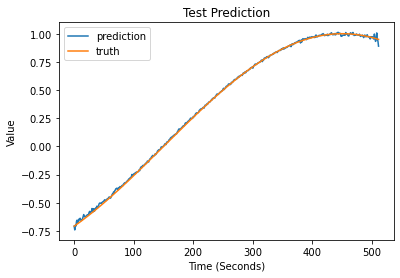

In [18]:
tester.plot(predictions, 0, 'vector_1')

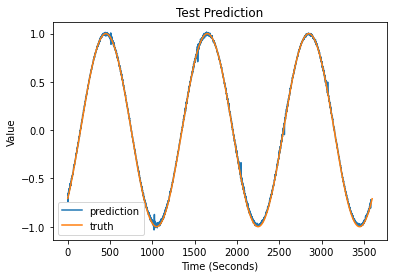

In [19]:
tester.plot(predictions, -1, 'vector_1')

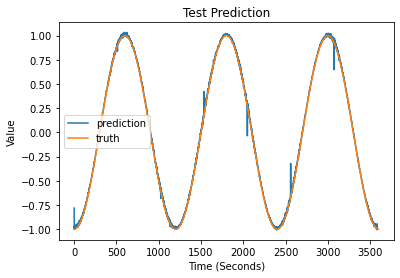

In [20]:
tester.plot(predictions, -1, 'vector_2')

In [21]:
tester.plot(predictions, -1, 'vector_2', return_data=True)

{'prediction': (array([0.000e+00, 1.000e+00, 2.000e+00, ..., 3.581e+03, 3.582e+03,
         3.583e+03]),
  array([-0.78192586, -0.9947625 , -0.97073597, ..., -0.9573268 ,
         -0.999024  , -0.9449841 ], dtype=float32)),
 'truth': (array([0.000e+00, 1.000e+00, 2.000e+00, ..., 3.597e+03, 3.598e+03,
         3.599e+03]),
  array([-1.0000001 , -0.99998623, -0.9999452 , ..., -0.99987656,
         -0.9999452 , -0.99998623], dtype=float32))}

©️ 2022 The Johns Hopkins University Applied Physics Laboratory LLC.